In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [10]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [12]:
features = ["enginesize","horsepower","carwidth","curbweight","highwaympg"]
target = "price"

In [13]:
x = df[features]
y = df[target]

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [15]:
x_train.shape,y_train.shape

((164, 5), (164,))

In [16]:
x_test.shape,y_test.shape

((41, 5), (41,))

In [18]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)
print(lr_model.coef_)
print(lr_model.intercept_)

[ 80.21110408  50.29982855 630.12237856   1.68747596 -40.4320105 ]
-46799.971701360344


In [19]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train, y_train)
print(ridge_model.coef_)
print(ridge_model.intercept_)

[ 80.20352725  50.30816498 627.12414946   1.69885907 -40.34665079]
-46633.94571097825


In [20]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(x_train, y_train)
print(lasso_model.coef_)
print(lasso_model.intercept_)

[ 80.20414245  50.30764533 629.32699505   1.69126671 -40.33241164]
-46760.21223361012


In [21]:
lr_preds = lr_model.predict(x_test)
ridge_preds = ridge_model.predict(x_test)
lasso_preds = lasso_model.predict(x_test)

In [22]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_preds))
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_preds))

In [23]:
lr_r2 = r2_score(y_test, lr_preds)
ridge_r2 = r2_score(y_test, ridge_preds)
lasso_r2 = r2_score(y_test, lasso_preds)

In [24]:
performance = pd.DataFrame({
    'Model': ['Multiple Regression', 'Ridge Regression', 'Lasso Regression'],
    'RMSE': [lr_rmse, ridge_rmse, lasso_rmse],
    'R² Score': [lr_r2, ridge_r2, lasso_r2]
})
print("Model Performance Comparison:\n", performance)

Model Performance Comparison:
                  Model         RMSE  R² Score
0  Multiple Regression  3816.532856  0.815490
1     Ridge Regression  3816.240450  0.815519
2     Lasso Regression  3816.360339  0.815507


In [26]:
alphas = [0.1, 5, 10]
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(x_train, y_train)
    ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_model.predict(x_test)))
    ridge_r2 = r2_score(y_test, ridge_model.predict(x_test))
    print(f"Ridge Regression (alpha={alpha}) -> RMSE: {ridge_rmse:.2f}, R² Score: {ridge_r2:.2f}")
    
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(x_train, y_train)
    lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_model.predict(x_test)))
    lasso_r2 = r2_score(y_test, lasso_model.predict(x_test))
    print(f"Lasso Regression (alpha={alpha}) -> RMSE: {lasso_rmse:.2f}, R² Score: {lasso_r2:.2f}")

Ridge Regression (alpha=0.1) -> RMSE: 3816.50, R² Score: 0.82
Lasso Regression (alpha=0.1) -> RMSE: 3816.52, R² Score: 0.82
Ridge Regression (alpha=5) -> RMSE: 3815.11, R² Score: 0.82
Lasso Regression (alpha=5) -> RMSE: 3815.67, R² Score: 0.82
Ridge Regression (alpha=10) -> RMSE: 3813.78, R² Score: 0.82
Lasso Regression (alpha=10) -> RMSE: 3814.81, R² Score: 0.82


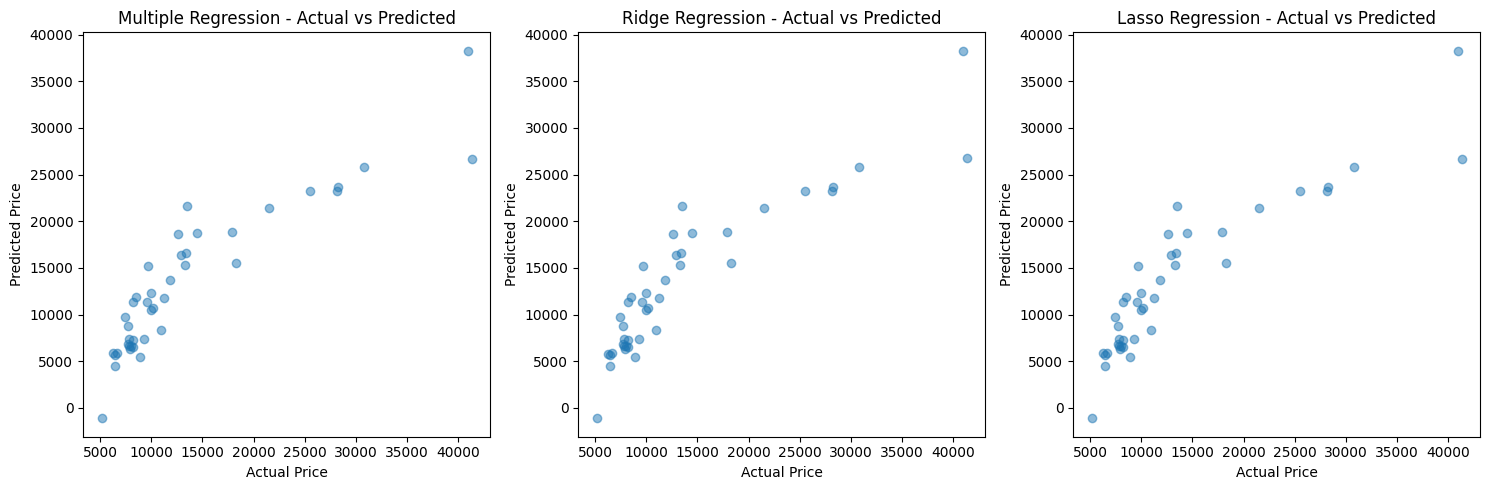

In [27]:
plt.figure(figsize=(15, 5))
models = {'Multiple Regression': lr_preds, 'Ridge Regression': ridge_preds, 'Lasso Regression': lasso_preds}
for i, (model_name, predictions) in enumerate(models.items()):
    plt.subplot(1, 3, i + 1)
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"{model_name} - Actual vs Predicted")
plt.tight_layout()
plt.show()